In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/기계학습/house_price.txt',names = ['size', 'price'])
print(data)

x=data['size']
y=data['price']
m = len(data)#52

         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393939   3.50
41  57.878788   6.30
42  30.909091   4.09
43  18.787879   2.20
44  28.181818   5.20
45  30.606061   3.30
46  21.212121

In [9]:
x = (np.array(x)).reshape(m,1)#모양 변환
y = (np.array(y)).reshape(m,1)
print(x.shape, y.shape)

(52, 1) (52, 1)


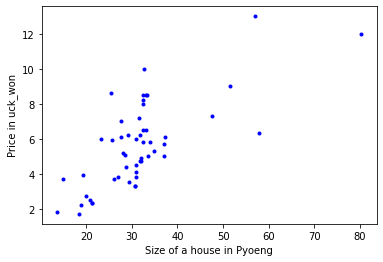

In [10]:
import matplotlib.pyplot as plt
plt.plot(x,y,'b.')#.b는 파란색 점
plt.xlabel("Size of a house in Pyoeng")
plt.ylabel("Price in uck_won")
plt.show()

In [11]:
x_b = np.c_[np.ones((m,1)),x]#앞에다가 1로채워진 m*1행렬을 붙여줌 , .c는 붙이는것 concatenation=옆으로 붙이는것

learning_rate = 0.0001
n_iter = 200 #횟수

theta = np.zeros((2,1))
gradients = np.zeros((2,1))

for i in range(n_iter):
    gradients = np.dot(x_b.T , x_b.dot(theta) - y)/m#.T는 행과 열값을 서로 바꿈, .dot은 행렬 곱해줌
    theta = theta - learning_rate * gradients
print("theta:")
print(theta)

theta:
[[0.00642125]
 [0.17560879]]


In [28]:
x_new = np.array([[10],[90]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b.dot(theta)
print("10평과 90평 집의 예측가격")
print(y_predict)

10평과 90평 집의 예측가격
[[ 1.76250917]
 [15.81121253]]


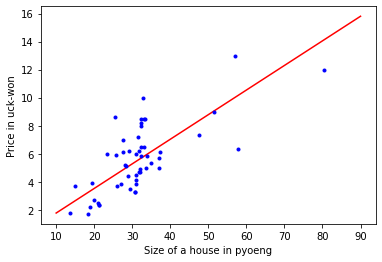

In [13]:
plt.plot(x_new, y_predict,'r-')
plt.plot(x,y,'b.')
plt.xlabel("Size of a house in pyoeng")
plt.ylabel("Price in uck-won")
plt.show()

In [15]:
x_mine = np.array([[25]])
x_mine_b = np.c_[np.ones((1,1)), x_mine]
y_predict = x_mine_b.dot(theta)
print(y_predict, "억원")

[[4.39664105]] 억원


In [18]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-fcvi4vhh
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-fcvi4vhh
     |████████████████████████████████| 154 kB 5.0 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-py3-none-any.whl size=27009 sha256=96c2809b8cf1ce3f21bc76b4a64c97b313747becc630ce82b1cff3940de951ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-drfijmxc/wheels/47/a5/46/9ca750026db9dfa5de4bf4836194554cb0e2e01a245588ea59
Successfully built hpsklearn


##gradient descent 대신 , 확률적 경사 하강법 합수호출하여 theta 구하기 

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, penalty = None, eta0 = 0.0001)
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

theta:
[0.00683682] [0.17733453]


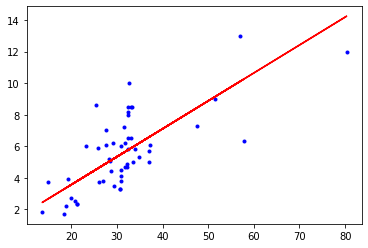

In [22]:
print("theta:")
print(sgd_reg.intercept_, sgd_reg.coef_)

y_pred = sgd_reg.predict(x)
plt.plot(x,y,'b.')
plt.plot(x,y_pred,'r')
plt.show()

## 비용함수 J(theta) 3차원 그래프로 그리기


In [24]:
def ComputeJ(t0,t1,x,y):
    m=len(x)
    x_b = np.c_[np.ones((m,1)),x]
    theta = np.array([t0,t1])
    
    
    cost_vector = x_b.dot(theta) - y
    
    cost_vector = cost_vector.reshape(-1)
    
    cost2 = np.square(cost_vector)
    
    cost_sum = np.sum(cost2)/(2*m)
    
    return cost_sum

In [25]:
d = 100

s=1.0
theta0 = np.linspace(-15*s, 15*s, d)
theta1 = np.linspace(-1.0*s, 1.0*s, d)

J = np.ones((d,d))
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        cost = ComputeJ(t0,t1,x,y)
        J[i,j] = cost

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


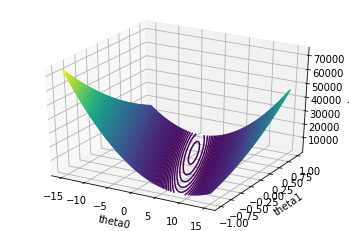

In [26]:
pX, pY = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(pX,pY,J,300,cmap = 'viridis')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J');
plt.show()